In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
dt = pd.read_csv("C:/Users/MSI/Downloads/archive/Advertising.csv")
dt.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [172]:
dt.shape

(200, 5)

In [173]:
dt.ndim

2

In [174]:
dt.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [175]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [176]:
dt.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [177]:
dt.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [178]:
dt.isnull().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [179]:
dt.duplicated().sum()

np.int64(0)

In [180]:
dt.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

[Text(0.5, 1.0, 'Correlation Matrix')]

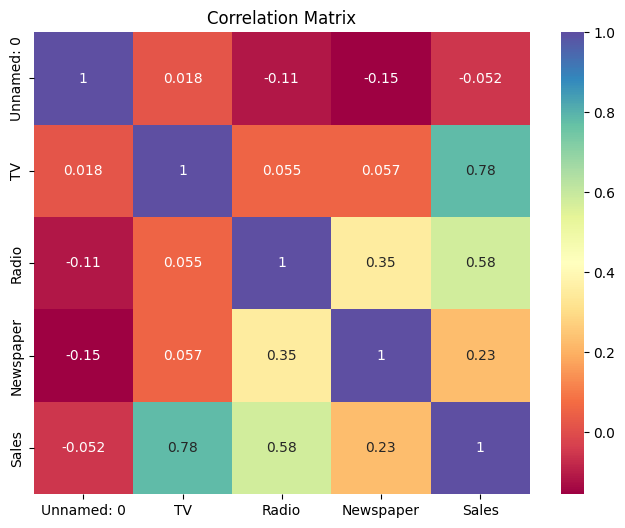

In [181]:
corr = dt.corr() 
plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [182]:
dt.sample(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
30,31,292.9,28.3,43.2,21.4
91,92,28.6,1.5,33.0,7.3
68,69,237.4,27.5,11.0,18.9


In [183]:
y=dt['Sales']
print(y.shape)
print()
y.head()

(200,)



0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [184]:
x=dt.drop(columns=['TV','Radio','Newspaper'])

In [185]:
x.head()

,Unnamed: 0,Sales
0,1,22.1
1,2,10.4
2,3,9.3
3,4,18.5
4,5,12.9


In [186]:
print(x.shape)
print(y.shape)

(200, 2)
(200,)


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [188]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,  train_size=0.7, random_state=1)

In [189]:
print(x.shape)
print(y.shape)
print()
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(200, 2)
(200,)

(140, 2)
(140,)

(60, 2)
(60,)


In [190]:
model = LinearRegression()

In [191]:
model.fit(x_train,y_train)

LinearRegression()

In [192]:
predict = model.predict(x_test)

In [193]:
predict[:4]

array([23.8, 16.6,  9.5, 14.8])

In [194]:
print("Accuracy of training dataset:", model.score(x_train,y_train))
print("Accuracy of test dataset:", model.score(x_test,y_test))

Accuracy of training dataset: 1.0
Accuracy of test dataset: 1.0


# Actual VS Predicted

In [195]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [196]:
test = pd.DataFrame({
    'Y test':y_test,
    'Y test predicted':y_pred_test
})
train = pd.DataFrame({
    'Y train':y_train,
    'Y train predicted':y_pred_train
})

In [197]:
test.sample(10)

,Y test,Y test predicted
162,14.9,14.9
193,19.6,19.6
199,13.4,13.4
33,17.4,17.4
40,16.6,16.6
31,11.9,11.9
177,11.7,11.7
94,11.5,11.5
98,25.4,25.4
39,21.5,21.5


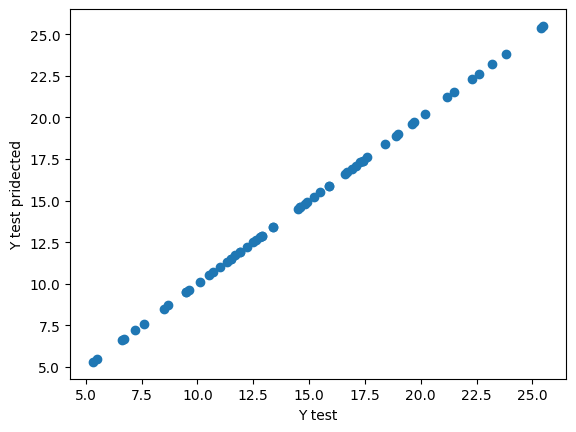

In [198]:
import matplotlib.pyplot as plt 
plt.scatter(y_test,predict)
plt.xlabel('Y test')
plt.ylabel('Y test pridected')
plt.show()

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [200]:
from math import sqrt
print('MAE = ', mean_absolute_error(y_test,predict))

MAE =  0.0


In [201]:
print('MSE =', mean_squared_error(y_test,predict))

MSE = 0.0


In [202]:
print('RMSE = ', sqrt(mean_squared_error(y_test,predict)))

RMSE =  0.0


In [203]:
dt.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [204]:
dt.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


# prediction

In [216]:
user = pd.DataFrame([[230.1, 37.8, 69.2]], columns=['TV', 'Radio', 'Newspaper'])

In [217]:
result = model.predict(user)
result

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Newspaper
- Radio
- TV
Feature names seen at fit time, yet now missing:
- Sales
- Unnamed: 0
